In [3]:
!pip install gradio yfinance --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.1/54.1 MB 19.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.9/322.9 kB 19.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 102.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 4.6 MB/s eta 0:00:00


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import gradio as gr
import joblib


In [5]:
# Cell 2: Load Dataset
# Simulating loading from CSV since the dataset content was shared as a table
data = pd.DataFrame({
    'Transaction ID': [1,2,3,4,5,6,7,8],
    'User ID': [101,102,103,104,105,106,101,108],
    'Transaction Amount': [100.5, 500.0, 10.0, 1000.0, 300.0, 1500.0, 5.0, 50.0],
    'Transaction Type': ['Purchase', 'Purchase', 'Purchase', 'Transfer', 'Refund', 'Purchase', 'Purchase', 'Purchase'],
    'Merchant ID': ['M001','M002','M003','M004','M005','M001','M001','M002'],
    'Timestamp': pd.to_datetime(['2025-05-13 10:05:00','2025-05-13 10:10:00','2025-05-13 10:15:00',
                                 '2025-05-13 10:20:00','2025-05-13 10:25:00','2025-05-13 10:30:00',
                                 '2025-05-13 10:35:00','2025-05-13 10:40:00']),
    'Location': ['New York, USA', 'London, UK', 'Berlin, Germany', 'Paris, France', 'Tokyo, Japan',
                 'New York, USA', 'New York, USA', 'Madrid, Spain'],
    'Card Type': ['Visa','MasterCard','Visa','MasterCard','Visa','Visa','Visa','MasterCard'],
    'Device ID': ['D001','D002','D003','D004','D005','D001','D001','D006'],
    'Transaction Status': ['Authorized','Authorized','Authorized','Flagged','Authorized','Flagged','Authorized','Authorized'],
    'Fraudulent': [0,0,0,1,0,1,0,0]
})


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Transaction ID      8 non-null      int64         
 1   User ID             8 non-null      int64         
 2   Transaction Amount  8 non-null      float64       
 3   Transaction Type    8 non-null      object        
 4   Merchant ID         8 non-null      object        
 5   Timestamp           8 non-null      datetime64[ns]
 6   Location            8 non-null      object        
 7   Card Type           8 non-null      object        
 8   Device ID           8 non-null      object        
 9   Transaction Status  8 non-null      object        
 10  Fraudulent          8 non-null      int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(6)
memory usage: 836.0+ bytes
None
       Transaction ID     User ID  Transaction Amount            Timestamp  \
co

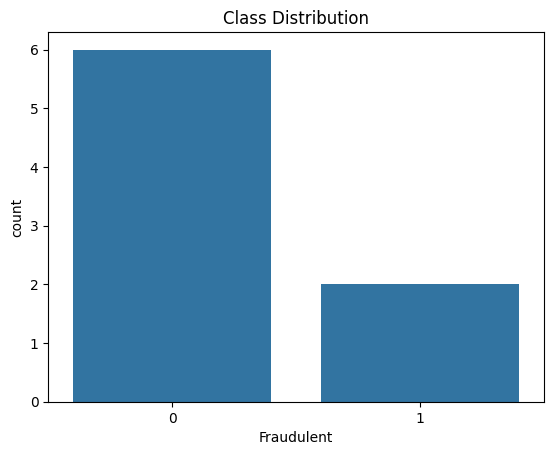

In [6]:
# Cell 3: EDA - Quick Overview
print(data.info())
print(data.describe())
print(data['Fraudulent'].value_counts())
sns.countplot(x='Fraudulent', data=data)
plt.title("Class Distribution")
plt.show()


In [7]:
# Cell 4: Feature Engineering
# Extract hour from timestamp
data['Hour'] = data['Timestamp'].dt.hour

# Drop columns not needed for modeling
data = data.drop(columns=['Transaction ID', 'Timestamp'])

# Encode categorical features
cat_cols = ['Transaction Type', 'Merchant ID', 'Location', 'Card Type', 'Device ID', 'Transaction Status']
label_encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Save label encoders
joblib.dump(label_encoders, "label_encoders.pkl")

# Scaling
scaler = StandardScaler()
features = data.drop(columns=['Fraudulent'])
scaled_features = scaler.fit_transform(features)

# Save scaler
joblib.dump(scaler, "scaler.pkl")

X = scaled_features
y = data['Fraudulent']


In [8]:
# Cell 5: Train-Test Split and Model Training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Save model
joblib.dump(clf, "fraud_model.pkl")


Accuracy: 0.5
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       0.00      0.00      0.00         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2

Confusion Matrix:
 [[1 0]
 [1 0]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


['fraud_model.pkl']

In [9]:
# Cell 6: Gradio Interface for Deployment
def predict_fraud(transaction_amount, transaction_type, merchant_id, location, card_type, device_id, status, hour):
    # Load model & preprocessors
    model = joblib.load("fraud_model.pkl")
    label_encoders = joblib.load("label_encoders.pkl")
    scaler = joblib.load("scaler.pkl")

    input_data = {
        'Transaction Amount': float(transaction_amount),
        'Transaction Type': label_encoders['Transaction Type'].transform([transaction_type])[0],
        'Merchant ID': label_encoders['Merchant ID'].transform([merchant_id])[0],
        'Location': label_encoders['Location'].transform([location])[0],
        'Card Type': label_encoders['Card Type'].transform([card_type])[0],
        'Device ID': label_encoders['Device ID'].transform([device_id])[0],
        'Transaction Status': label_encoders['Transaction Status'].transform([status])[0],
        'Hour': int(hour)
    }

    df = pd.DataFrame([input_data])
    df_scaled = scaler.transform(df)
    prediction = model.predict(df_scaled)[0]
    return "Fraudulent" if prediction == 1 else "Legitimate"

gr_interface = gr.Interface(
    fn=predict_fraud,
    inputs=[
        gr.Number(label="Transaction Amount"),
        gr.Textbox(label="Transaction Type (e.g., Purchase, Transfer, Refund)"),
        gr.Textbox(label="Merchant ID (e.g., M001)"),
        gr.Textbox(label="Location (e.g., New York, USA)"),
        gr.Textbox(label="Card Type (e.g., Visa, MasterCard)"),
        gr.Textbox(label="Device ID (e.g., D001)"),
        gr.Textbox(label="Transaction Status (e.g., Authorized, Flagged)"),
        gr.Number(label="Transaction Hour (0-23)")
    ],
    outputs="text",
    title="AI-Powered Credit Card Fraud Detection"
)

gr_interface.launch()


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://d94ea8db27d5192118.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
